In [1]:
# -*- encoding:utf8 -*-
import pandas as pd
import numpy as np
import konlpy
import sys
if sys.version_info <= (2,7):
    reload(sys)
    sys.setdefaultencoding('utf-8')
from konlpy.tag import Kkma, Okt, Hannanum
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
kkma = Kkma()
okt = Okt()
hannanum = Hannanum()
%matplotlib inline

In [2]:
poems = pd.read_csv('poems_last.csv',header=0,encoding='CP949',error_bad_lines=False)
poems
# 총 데이터수 6591개

,시인 이름,"성별(남1,여0)",시
0,김병래,1.0,뿔\n?????? 김 병 래\n?\n뿔은 짐승에게만\n있는 것이 아니다\n?\n사람...
1,김관형,1.0,"<font color=""gray"">\n\n\n\n꿈의 보람\n송암 \n\n?\n진실..."
2,채영선,0.0,"<font color=""gray""> \n \n 미안해 / 소담 \..."
3,문재학,1.0,진눈깨비의 비애(悲哀)\n소산/문 재학\n\n\n젖어서 슬픈 미련의 진눈깨비\n사랑...
4,이기호,1.0,"<font color=""gray"">?\n?\n\n늘 좋은 생각\n? \n서당 \n..."
...,...,...,...
6218,박만엽,1.0,"<font color=""gray"">\n\n\n\n인연(因緣)이란 ~ \n\n\n인연..."
6219,고창표,1.0,"<font color=""gray"">\n?\n산은 나에게\n??????????????..."
6220,박두범,1.0,"<font color=""gray"">\n\n\n“섬과 섬 사이” /운암 \n? \n속..."
6221,조성설,1.0,"<font color=""gray"">\n겨울나무\n水山/\n? \n고즈넉한 등산로에\..."


(<matplotlib.axes._subplots.AxesSubplot at 0x1a93a106b70>, 6223)

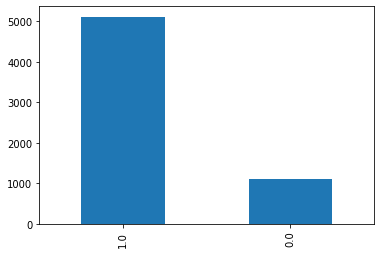

In [3]:
poems['성별(남1,여0)'].value_counts().plot(kind='bar'), len(poems)
# 남성시인 데이터가 훨씬 많다 ㅠ

In [4]:
train_data = poems.drop(['성별(남1,여0)'],axis=1)
target_data = poems[['성별(남1,여0)']]
train_data = train_data.replace('\\n','',regex=True)
train_data = train_data.replace('\?','',regex=True)
train_data = train_data.replace('<font color="gray">','',regex=True)
train_data = train_data.replace('</font>','',regex=True)
train_data  = train_data.replace('&amp;nb','',regex=True)
train_data  = train_data.replace('&amp;n','',regex=True)
train_data  = train_data.replace('\...','',regex=True)
train_data  = train_data.replace(['\(','\)'],'',regex=True)
train_data

,시인 이름,시
0,김병래,뿔 김 병 래뿔은 짐승에게만있는 것이 아니다사람에게도 있다신종코로나로마스크 값이하늘...
1,김관형,꿈의 보람송암 진실한 꿈의 보람은삶이 활짝 피운 이룸의 꽃이다세월 갈피에 우쭐한 모...
2,채영선,미안해 / 소담 미안해 이파리가 많아서 ...
3,문재학,진눈깨비의 비애悲哀소산/문 재학젖어서 슬픈 미련의 진눈깨비사랑 잃은 길 위에 질척거...
4,이기호,늘 좋은 생각 서당 우리는 삶의 늘 좋은 생각을 갖고자신의 행복을 추구하며 살자...
...,...,...
6218,박만엽,인연因緣이란 ~ 인연이 있으면멀리 떨어져 있어도언젠가는만난다고 하지만보고느끼고마음을...
6219,고창표,산은 나에게 만심 내가 기지개 켜며
6220,박두범,“섬과 섬 사이” /운암 속살 드러내어 부르는 삶의 파노라마잡힐 듯 손닿지 않는 ...
6221,조성설,겨울나무水山/ 고즈넉한 등산로에가지 꺾여 우는한 그루 나무 서 있다 등산객 다리 ...


In [5]:
target_data.isnull().sum(), train_data.isnull().sum()
# 성별(label)값에 4개가 Nan임!

(성별(남1,여0)    4
 dtype: int64,
 시인 이름    0
 시        0
 dtype: int64)

In [6]:
target_data['성별(남1,여0)'] = target_data['성별(남1,여0)'].fillna(0)
target_data.isnull().sum()

C:\Users\zebra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


성별(남1,여0)    0
dtype: int64

In [7]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를',
             '으로','자','에','와','한','하다']
# stopwords = 불용어
poem_X = okt.morphs(train_data['시'][0],stem=True)
poem_X
# 첫번째 시 '뿔' 테스트

['뿔',
 '김',
 '병',
 '래',
 '뿔',
 '은',
 '짐승',
 '에게만',
 '있다',
 '것',
 '이',
 '아니다',
 '사람',
 '에게도',
 '있다',
 '신종',
 '코로나',
 '로',
 '마스크',
 '값',
 '이하늘',
 '높이',
 '치솟다',
 '사람',
 '들',
 '눈',
 '에',
 '붉다',
 '뿔',
 '이',
 '돋아나다',
 '보이지',
 '않다',
 '만지다',
 '수',
 '없다',
 '뿔',
 '이지만',
 '탱자나무',
 '가시',
 '보다',
 '더',
 '무섭다',
 '예리하다',
 '붉다',
 '뿔',
 '이다']

In [8]:
matrix=[]
for poem in train_data['시']:
    poem_X = []
    poem_X = okt.morphs(poem, stem=True)
    poem_X = [word for word in poem_X if not word in stopwords]
    matrix.append(poem_X)
matrix[1]

['꿈',
 '보람',
 '송암',
 '진실하다',
 '꿈',
 '보람',
 '삶',
 '활짝',
 '피우다',
 '이루다',
 '꽃',
 '이다',
 '세월',
 '갈피',
 '우쭐',
 '모습',
 '새',
 '로움',
 '빛나다',
 '맵시',
 '이다',
 '숨결',
 '을',
 '어가',
 '화려하다',
 '연기',
 '뛰어나다',
 '가치',
 '이다',
 '꿈',
 '을',
 '아름',
 '묶다',
 '피땀',
 '짚',
 '인',
 '깡마르다',
 '누리',
 '피우다',
 '보람',
 '이다',
 '쓰라리다',
 '너저분하다']

In [9]:
matrix[7]

['어느', '시인', '詩人', '독백', '가시고기', '일생']

In [10]:
poem2 = pd.read_csv('유명한시.csv',encoding='CP949')
poem2 = poem2[1:]
poem2

,시제목,시인,성별(남1 여0),시
1,꽃 두고 ...,최남선,1.0,나는 꽃을 즐겨 맞노라. 그러나 그의 아리따운 태도를 보고 눈이 어리어 그의 ...
2,비둘기 ...,이광수,1.0,오오 봄 아침에 구슬프게 우는 비둘기 죽은 그 애가 퍽으나도 설게 듣던 비둘기 ...
3,샘물이 혼자서 ...,주요한,1.0,샘물이 혼자서 춤추며 간다. 산골짜기 돌 틈으로 샘물이 혼자서 웃...
4,불놀이 ...,주요한,1.0,아아 날이 저문다. 서편 하늘에 외로운 강물 위에 스러져 가는 분홍빛 놀 ...
5,빗소리 ...,주요한,1.0,비가 옵니다. 밤은 고요히 깃을 벌리고 비는 뜰 위에 속삭입니다. 몰래 지...
...,...,...,...,...
392,그 날 ...,이성복,1.0,(李晟馥) 그 날 아버지는 일곱 시 기차를 타고 금촌으로 떠났고 여동생은 아홉 ...
393,세속도시의 즐거움 ...,최승호,1.0,(崔勝鎬) 상복 허리춤에 전대를 차고 곡하던 여인은 늦은 밤 손익을 계산해 본...
394,새들도 세상을 뜨는구나 ...,황지우,1.0,(黃芝雨) 영화가 시작하기 전에 우리는 일제히 일어나 애국가를 경청한다. 삼천...
395,섬진강 ...,김용택,1.0,(金龍澤) 가문 섬진강을 따라가며 보라 퍼가도 퍼가도 전라도 실핏줄 같은 개울...


In [11]:
train_data2 = poem2[['시']]
target_data2 = poem2[['성별(남1 여0)']]

In [12]:
matrix2=[]
for poem2 in train_data2['시']:
    poem_X = []
    poem_X = okt.morphs(poem2, stem=True)
    poem_X = [word for word in poem_X if not word in stopwords]
    matrix2.append(poem_X)
matrix2

[['나',
  '꽃',
  '을',
  '즐기다',
  '맞다',
  '.',
  '그러나',
  '그',
  '아리땁다',
  '태도',
  '보고',
  '눈',
  '어리다',
  '그',
  '향기롭다',
  '냄새',
  '맡다',
  '코',
  '반하다',
  '정신없이',
  '그',
  '즐기다',
  '맞다',
  '아니다',
  '다만',
  '칼날',
  '같다',
  '북풍',
  '(',
  '北風',
  ')',
  '을',
  '덥다',
  '기운',
  '으로써',
  '인정',
  '없다',
  '살기',
  '(',
  '殺氣',
  ')',
  '깊다',
  '사랑',
  '으로써',
  '대신',
  '바꾸다',
  '뼈',
  '저리다',
  '얼음',
  '밑',
  '눌리',
  '고',
  '피',
  '얼리다',
  '눈',
  '구',
  '덩',
  '파묻히다',
  '있다',
  '억만',
  '목숨',
  '을',
  '건지다',
  '집다',
  '내다',
  '다시',
  '살리다',
  '봄바람',
  '을',
  '표장',
  '(',
  '表章',
  ')',
  '함',
  '나',
  '그',
  '즐기다',
  '맞다',
  '.',
  '나',
  '꽃',
  '을',
  '즐기다',
  '보노',
  '라',
  '.',
  '그러나',
  '그',
  '평화',
  '기운',
  '머',
  '금은',
  '웃다',
  '얼굴',
  '흘리다',
  '그',
  '부귀',
  '기상',
  '나타내다',
  '성',
  '(',
  '盛',
  ')',
  '모양',
  '타다',
  '주책',
  '(',
  '主着',
  ')',
  '없이',
  '그',
  '즐기다',
  '봄',
  '아니다',
  '다만',
  '겉모양',
  '곱다',
  '것',
  '매양',
  '실상',
  '적다',
  '처음',
  '서슬',
  '장하다',
  '것',
  '대개',
  '뒤끝',

In [13]:
matrix = [x for x in matrix if str(x) !='nan']

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 35000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(matrix)
tokenizer.fit_on_texts(matrix2)
sequences = tokenizer.texts_to_sequences(matrix)
sequences2 = tokenizer.texts_to_sequences(matrix2)
word_to_index = tokenizer.word_index
sequences2

[[14,
  13,
  1,
  901,
  250,
  4,
  648,
  9,
  5132,
  7713,
  160,
  35,
  205,
  9,
  582,
  507,
  1251,
  1147,
  6942,
  4278,
  9,
  901,
  250,
  63,
  1615,
  1356,
  39,
  6850,
  5,
  21550,
  7,
  1,
  1105,
  807,
  6142,
  1379,
  15,
  1531,
  5,
  21551,
  7,
  144,
  24,
  6142,
  1759,
  1803,
  800,
  2185,
  934,
  377,
  4760,
  19,
  231,
  3600,
  35,
  522,
  3283,
  3066,
  3,
  5321,
  906,
  1,
  1868,
  1115,
  86,
  243,
  1238,
  779,
  1,
  21552,
  5,
  21553,
  7,
  838,
  14,
  9,
  901,
  250,
  4,
  14,
  13,
  1,
  901,
  3893,
  135,
  4,
  648,
  9,
  1132,
  807,
  546,
  1264,
  153,
  106,
  479,
  9,
  6373,
  3100,
  11197,
  93,
  5,
  21554,
  7,
  895,
  214,
  10326,
  5,
  21555,
  7,
  66,
  9,
  901,
  60,
  63,
  1615,
  7003,
  264,
  10,
  6457,
  3771,
  444,
  603,
  2604,
  2465,
  10,
  12551,
  7953,
  15,
  356,
  799,
  445,
  6129,
  5133,
  2455,
  21556,
  5,
  21557,
  7,
  9101,
  63,
  991,
  12373,
  5,
  21558,
  7,

In [15]:
X_data2 = sequences2
X_data = sequences
print('시의 최대 길이:',max(len(l) for l in X_data2))
print('시의 평균 길이:',sum(map(len,X_data2))/len(X_data2))

시의 최대 길이: 744
시의 평균 길이: 131.19949494949495


In [16]:
max_len = 67
max_len2 = 744
# 전체 데이터 셋 길이를 67로 맞추기 위해 패딩
data = pad_sequences(X_data,maxlen=max_len2)
data2 = pad_sequences(X_data2,maxlen=max_len2)
data.shape

(6223, 744)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data,target_data,test_size=0.2)
x_train[1]
# TRAIN_TEST_SPLIT

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [42]:
x_train = np.array(list(x for x in x_train))
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
data2 = np.array(data2)
target_data2 = np.array(target_data2)
# 혹시 모르니 np.array로!
x_train[0:5]

array([[    0,     0,     0, ...,  1148,   559,    40],
       [    0,     0,     0, ...,    11,  9047,   991],
       [    0,     0,     0, ...,  1355,  3822,  4926],
       [    0,     0,     0, ...,  5021,  7840, 13815],
       [    0,     0,     0, ...,     1,  2400,  2257]])

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

print('training set accuracy:',tree.score(x_train, y_train))
print('test set accuracy:',tree.score(x_test,y_test))
print('test2 set accurcay:',tree.score(data2,target_data2))

prediction_by_tree = tree.predict(x_test)
prediction_by_tree
# train set accuracy 가 1.0이 나오는 이유는?

training set accuracy: 0.9997991161108879
test set accuracy: 0.7068273092369478
test2 set accurcay: 0.6616161616161617


array([1., 1., 1., ..., 1., 1., 1.])

# RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(x_train,y_train)

print('training set accuracy:',forest.score(x_train,y_train))
print('test set accuracy:',forest.score(x_test,y_test))
print('test2 set accurcay:',forest.score(data2,target_data2))

prediction_by_forest = forest.predict(x_test)
prediction_by_forest

C:\Users\zebra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


training set accuracy: 0.9921655283246283
test set accuracy: 0.7831325301204819
test2 set accurcay: 0.8156565656565656


array([1., 1., 1., ..., 1., 1., 1.])

In [26]:
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense
from tensorflow.keras.models import Sequential

In [47]:
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index)+1
model = Sequential()
model.add(Embedding(vocab_size,32)) # 임베딩 벡터의 차원 32
model.add(SimpleRNN(32)) # hidden_size 32
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=3,batch_size=64,validation_split=0.2)
# 함수 = sigmoid, 손실함수 = binary_crossentropy, validation split = 0.2

Train on 3982 samples, validate on 996 samples
Epoch 1/3
3982/3982 [==============================] - 11s 3ms/sample - loss: 0.4892 - acc: 0.8064 - val_loss: 0.4554 - val_acc: 0.8313
Epoch 2/3
3982/3982 [==============================] - 10s 2ms/sample - loss: 0.4625 - acc: 0.8016 - val_loss: 0.4491 - val_acc: 0.8313
Epoch 3/3
3982/3982 [==============================] - 10s 2ms/sample - loss: 0.3265 - acc: 0.8574 - val_loss: 0.4521 - val_acc: 0.8293


In [52]:
model.evaluate(data2,target_data2)[1]

396/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.96464646

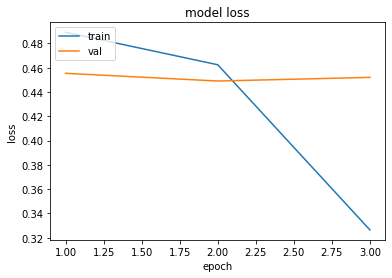

In [50]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# loss가 마이너스로 가는이유